# Big Mart Sales Prediction

## Table of contents
1. Problem Statement
2. Hypothesis Generation
3. Loading Packages and Data
4. Data Structure and Content
5. Exploratory Data Analysis
6. Univariate Analysis
7. Bivariate Analysis
8. Missing Value Treatment
9. Feature Engineering
10. Encoding Categorical Variables(Label Encoding)
11. One Hot Encoding
12. Pre-processing data
13. Modelling
    - Linear Regression
    - Regularized Linear Regression
    - Random Forest
    - XGBoost
18. Summary

## 1. Problem Statement

> The BigMart has collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

The aim of this project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### 1.1 Data
We have two csv files, one is train (8523) and second is test (5681) datasets consisting of 12 features, train data set has both input and output variable. We need to predict the sales for test data set.

|Sr.No.|Variable|Description|
|-|-|-|
|1|Item_Identifier|Unique product ID|
|2|Item_Weight|Weight of product|
|3|Item_Fat_Content|Whether the product is low fat or not|
|4|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|5|Item_Type|The category to which the product belongs|
|6|Item_MRP|Maximum Retail Price (list price) of the product|
|7|Outlet_Identifier|Unique store ID|
|8|Outlet_Establishment_Year|The year in which store was established|
|9|Outlet_Size|The size of the store in terms of ground area covered|
|10|Outlet_Location_Type|The type of city in which the store is located|
|11|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|12|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted|

## 2. Hypothesis Generation

Store Level Hypothesis:
1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.
4. Competitors: Stores haveing similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular markeplaces should have higher sales because of getting better access to customers.
7. Customers behaviour: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambience: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

Product Level Hypothesis:
1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

> Table: Features and their relation to hypotheses

|Sr.No.|Variable|Relation to hypotheses|
|-|-|-|
|1|Item_Identifier|ID variable|
|2|Item_Wight|Not considered in any hypothesis|
|3|Item_Fat_Content|Linked to 'utility' hypothesis. Low fat items are generally used more than others|
|4|Item_Visibility|Linked to 'Display Area' hypothesis|
|5|Item_Type|More inferences about 'Utility' can be derived from this|
|6|Item_MRP|Not considered in any hypothesis|
|7|Outlet_Identifier|ID variable|
|8|Outlet_Establishment_Year|Not considered in any hypothesis|
|9|Outlet_Size|Linked to 'Store Capacity' hypothesis|
|10|Outlet_Location_Type|Linked to 'City Type' hypothesis|
|11|Outlet_Type|Linked to 'Store Capacity' hypothesis|
|12|Item_Outlet_Sales|Outcome or target variable|

## 3. Loading Packages and Data

In [282]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [214]:
# import data
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")

# Lets check few rows from our train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [215]:
# Lets check few rows from our test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


It is generally a good idea to combine both train and test data sets into one to perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train.

Let's combine them into a dataframe `df` with a `source` column specifying where each observation belongs.

In [216]:
# Adding source column into train and test data
train["source"] = "train"
test["source"] = "test"

# Combining both the data sets
df = pd.concat([train, test], ignore_index=True)
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5729,NCV54,NaN,Low Fat,0.057969,Household,119.3124,OUT019,1985,Small,Tier 1,Grocery Store,474.0496,train
11491,FDZ23,NaN,Regular,0.118189,Baking Goods,185.2240,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test
400,NCK31,NaN,Low Fat,0.026917,Others,50.9666,OUT027,1985,Medium,Tier 3,Supermarket Type3,717.7324,train
3079,DRH11,5.980,Low Fat,0.075495,Hard Drinks,55.3614,OUT013,1987,High,Tier 3,Supermarket Type1,497.3526,train
156,FDB36,5.465,Regular,0.000000,Baking Goods,132.5626,OUT018,2009,Medium,Tier 3,Supermarket Type2,262.3252,train


## 4. Data Structure and content

In [217]:
# Check shape of our datasets
print(f"The shape of train data: {train.shape}")
print(f"The shape of test data: {test.shape}")
print(f"The shape of combined dataset df: {df.shape}")

The shape of train data: (8523, 13)
The shape of test data: (5681, 12)
The shape of combined dataset df: (14204, 13)


In [218]:
# Check what are column names in our dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

## 5. Exploratory Data Analysis

In [219]:
# check columnwise non-null  and datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [220]:
# Checking for missing values, if any
isnull_df = pd.DataFrame(df.isnull().sum(), columns=["missing_values"])
isnull_df["%"] = isnull_df["missing_values"]*100/len(df)
isnull_df

,missing_values,%
Item_Identifier,0,0.000000
Item_Weight,2439,17.171219
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,4016,28.273726
Outlet_Location_Type,0,0.000000


🔎 Observations:
- `Item_Weight` has 2439 (~17%) missing values
- `Outlet_Size` has 4016 (~28%) missing values
- The `Item_Outlet_Sales` is the target variable and missing values are ones in the test set. So, we need not worry about it.
- We'll apply suitable imputation on `Item_Weight` and `Outlet_Size` columns.

In [221]:
# Let's chech statisical information of numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


🔎 Observations:
- The lower 'count' of `Item_Weight` shows the presence of missing values.
- `Item_Visibility` has a min value of 0. It makes no practical sense as because when a product is being sold in a store, the visibility cannot be 0.
- `Item_MRP` has Q3 (third quartile) as 185.86 and maximum value as 266.89 which may indicate that there is a presence of outliers.
- `Outlet_Establishment_Years` vary from 1985 to 2009. If we can convert the year to how old the particular store is, it becomes more valuable and it might have a better impact on sales.
- The lower 'count' of `Item_Outlet_Sales` shows the presence of missing values (values from test_data).

In [222]:
# Let's check unique values and value counts in categorical columns
for column in df.select_dtypes(object).columns:
    print(f"--------------{column}---------------")
    print(df[column].value_counts(), "\n")

--------------Item_Identifier---------------
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64 

--------------Item_Fat_Content---------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

--------------Item_Type---------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64 

--------------Outlet_Identifier---------------
OUT027  

🔎 Observations:
- There are typos and difference in representation in categories of `Item_Fat_Content` variable. Some of 'Low Fat' values are also shown as 'low fat' and 'LF'. Also, some 'Regular' are mentioned as 'regular'.

In [223]:
# Let's compare category value counts of column "Item_Fat_Content" after correct replacement
print("Original categories:")
print(df.Item_Fat_Content.value_counts())
print("--------------------")
print("Modified categories:")
df.Item_Fat_Content = df.Item_Fat_Content.replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})
print(df.Item_Fat_Content.value_counts())

Original categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
--------------------
Modified categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [224]:
# Let's check number of unique values in categorical columns
for column in df.select_dtypes(object).columns:
    print(f"{column} : {df[column].nunique()}")

Item_Identifier : 1559
Item_Fat_Content : 2
Item_Type : 16
Outlet_Identifier : 10
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
source : 2


🔎 Observations:
- There are total 1559 products but total IDs are 14204 which shows the presence of duplicate IDs due to same product being available at multiple stores
- `Item_Type` has 16 unique values
- Big Mart has 10 outlets/stores
- There are 3 types of outlets/stores on the basis of area covered ie. `Outlet_Size`
- There are 3 types of locations for an outlet/store
- There are 4 types of outlets/stores on the basis of store capacity which is represented by `Outlet_Type`

In [225]:
# Checking for duplicate IDs
print(f"There are {df.Item_Identifier.duplicated().sum()} duplicate IDs for {len(df)} total entries")

There are 12645 duplicate IDs for 14204 total entries


In [226]:
df.Item_Identifier.duplicated().sum()

12645

Let's separate the numerical variables and categorical variables for further analysis.

In [227]:
# Numerical features
numerical_features = df.select_dtypes(np.number)
numerical_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [228]:
# Categorical features
categorical_features = df.select_dtypes(object)
categorical_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
source                  object
dtype: object

Let's visualize our numerical columns using *Pairplot*

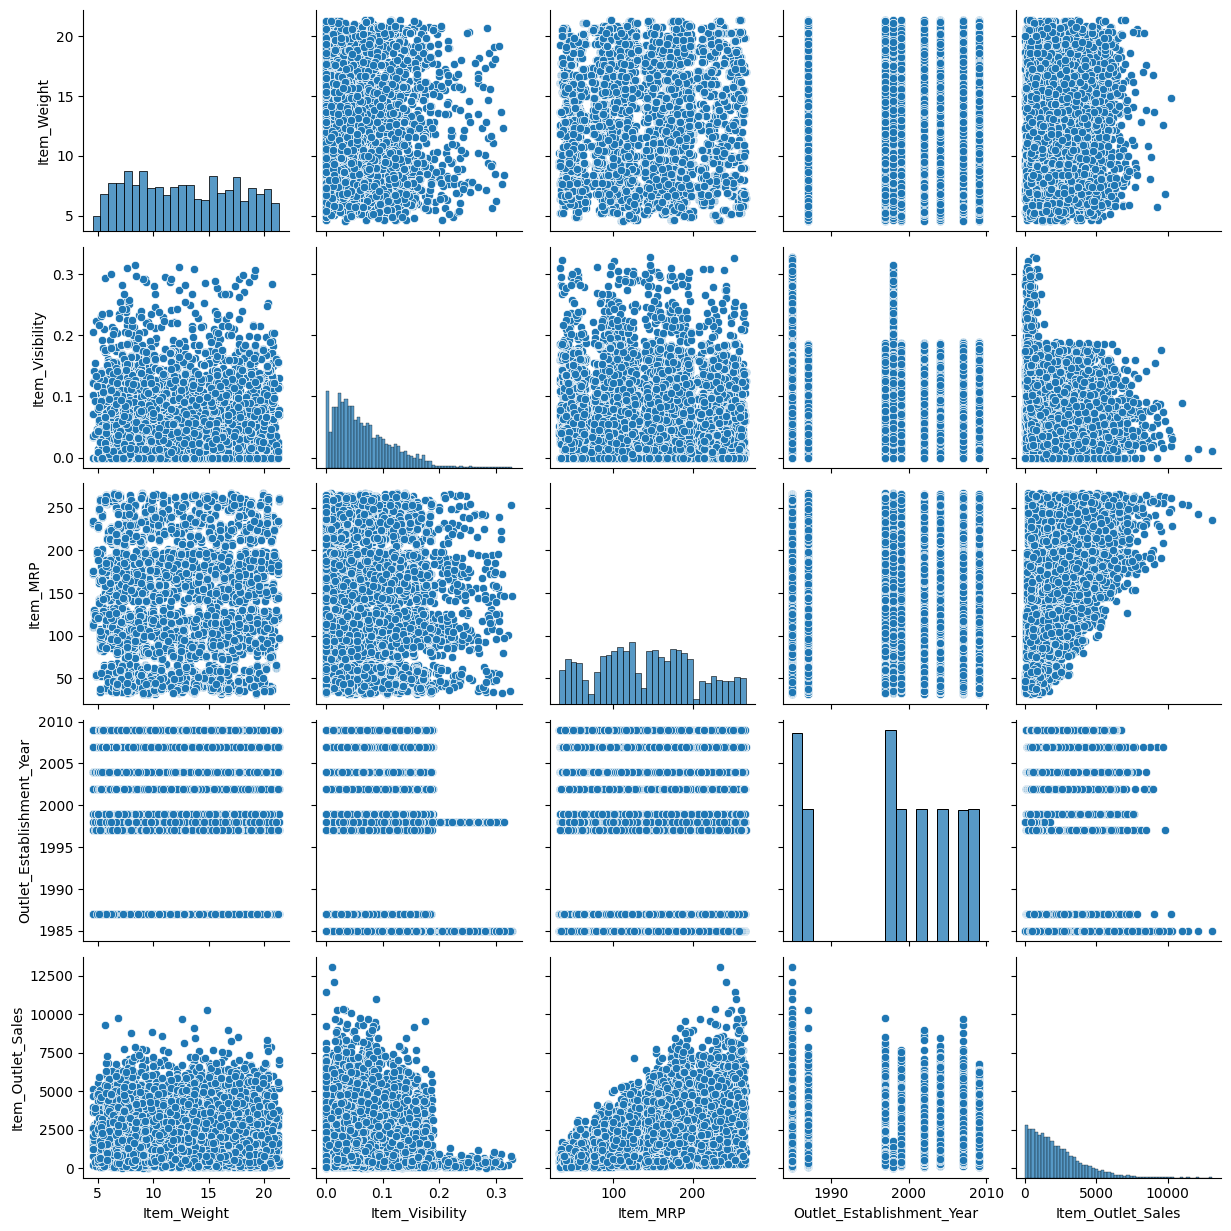

In [229]:
# plotting numerical columns in pairplot
sns.pairplot(df);

🔎 Observations:
- `Item_MRP` and `Item_Visibility` show a kind relationship/pattern with respect to `Item_Outlet_Sales`

Correlation heatmap for numerical variables

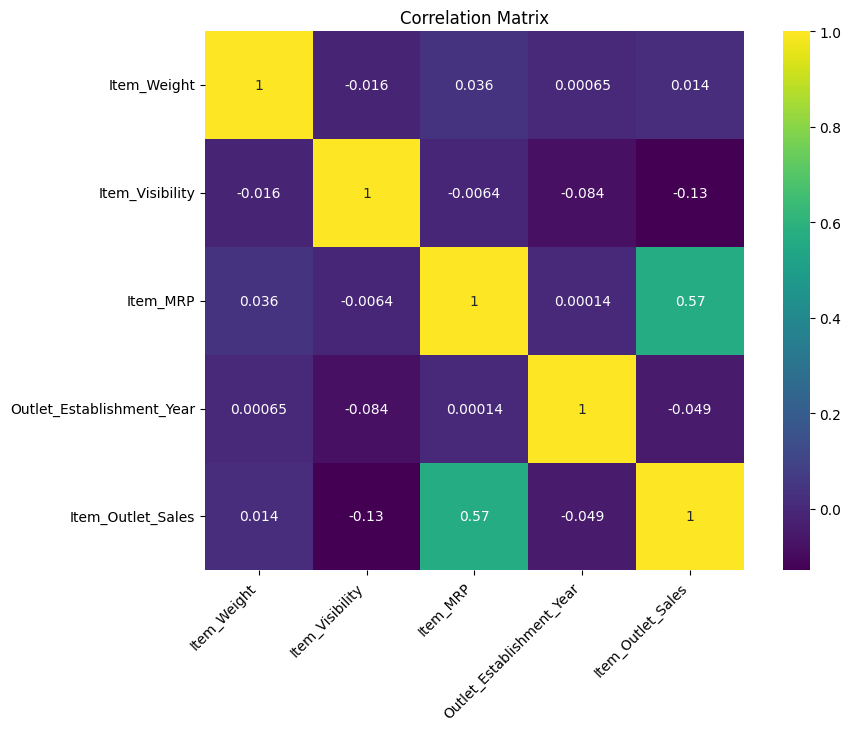

In [230]:
# Plotting correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True, cmap='viridis' )
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Matrix");

🔎 Observations:
- `Item_Weight` has almost negligible correlation (1.4%) with the target variable `Item_Outlet_Sales`.
- `Item_Visibility` is having weak correlation (-13%) with the target variable. This means that the sales are weakly affected by visibility of item which is a contradiction to the general assumption of "more visibility thus more sales".
- `Item_MRP` is positively correlated with sales at an outlet, which indicates that the price quoted by an outlet plays an important role in sales. Variation in MRP quoted by various outlets depends on their individual sales.

## 6. Univariate Analysis

### 6.1 Distribution of the target variable: `Item_Outlet_Sales`

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

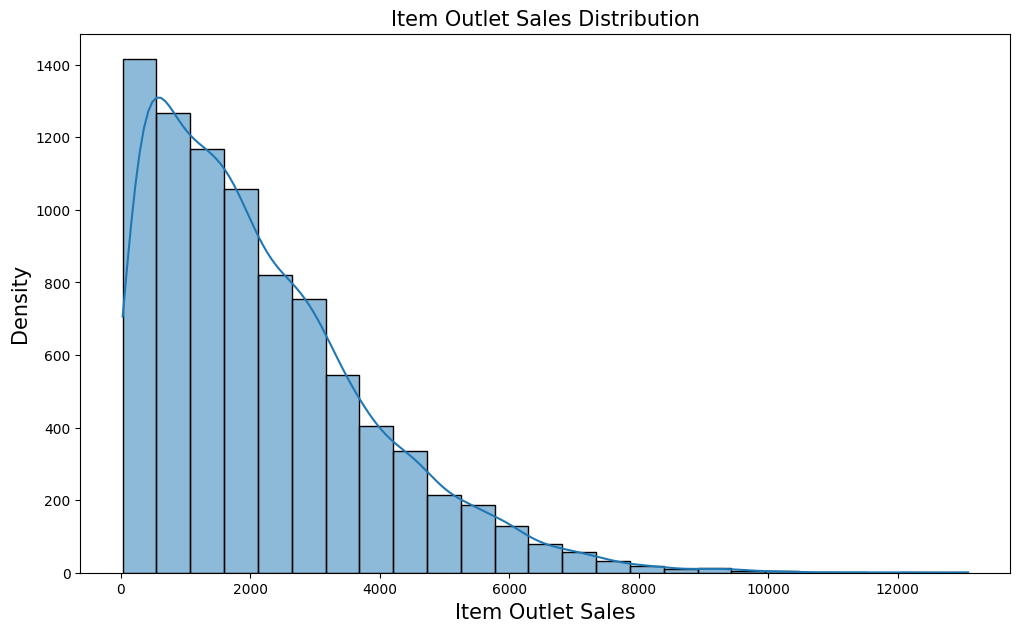

In [231]:
# plotting distribution of Item_outlet_sales
plt.figure(figsize=(12, 7))
sns.histplot(df.Item_Outlet_Sales, bins=25, kde=True)
plt.xlabel("Item Outlet Sales", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("Item Outlet Sales Distribution", fontsize=15)

In [232]:
print("Skewness:", df.Item_Outlet_Sales.skew())
print("Kurtosis:", df.Item_Outlet_Sales.kurt())

Skewness: 1.1775306028542796
Kurtosis: 1.6158766814287264


🔎 Observations:
- Skewness > 1, indicates that the distribution of Item_Outlet_Sales is highly positively skewed
- Kurtosis > 1, shows that the distribution is leptokurtic

### 6.2 Distribution of the numerical variables

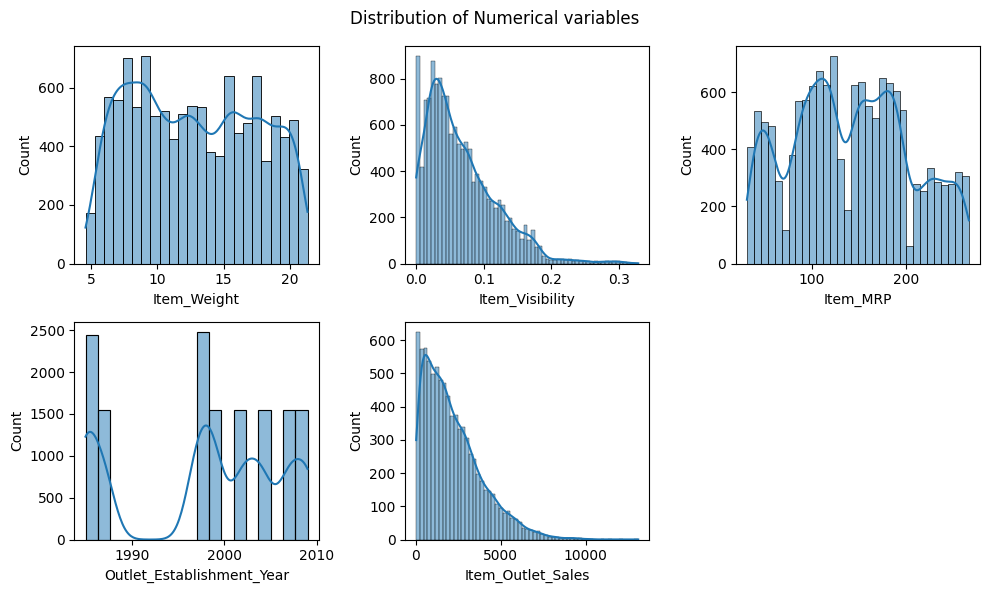

In [233]:
# checking histogram of numerical variables
plt.figure(figsize=(10,6))
for i in range(numerical_features.shape[1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[numerical_features.columns[i]], kde=True)
plt.suptitle("Distribution of Numerical variables")
plt.tight_layout()
plt.show()

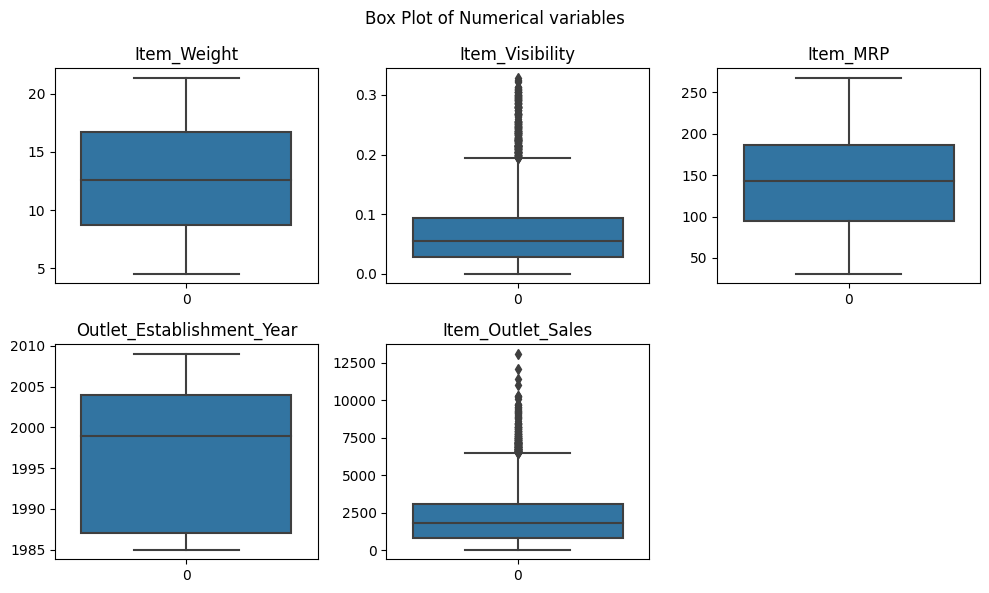

In [234]:
# checking boxplot of numerical variables
plt.figure(figsize=(10,6))
for i in range(numerical_features.shape[1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[numerical_features.columns[i]])
    plt.title(numerical_features.columns[i])
plt.suptitle("Box Plot of Numerical variables")
plt.tight_layout()
plt.show()

🔎 Observations:
- Histogram and Boxplot above show presence of outliers in `Item_Visibility` and `Item_Outlet_Sales` columns
- The `Item_MRP` histogram clearly shows, there 4 different price categories. Let's define them to be "Low", "Medium", "High" and "Very High"

### 6.3 Categorical Variables

#### 6.3.1 Distribution of the `Item_Fat_Content`

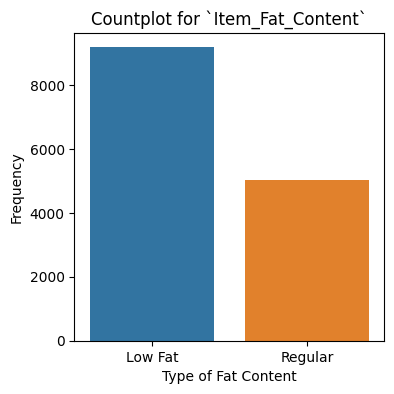

In [235]:
# Countplot for Item_Fat_content
plt.figure(figsize=(4,4))
sns.countplot(df, x='Item_Fat_Content')
plt.title("Countplot for `Item_Fat_Content`")
plt.ylabel("Frequency")
plt.xlabel("Type of Fat Content")
plt.show()

#### 6.3.2 Distribution of the `Item_Type`

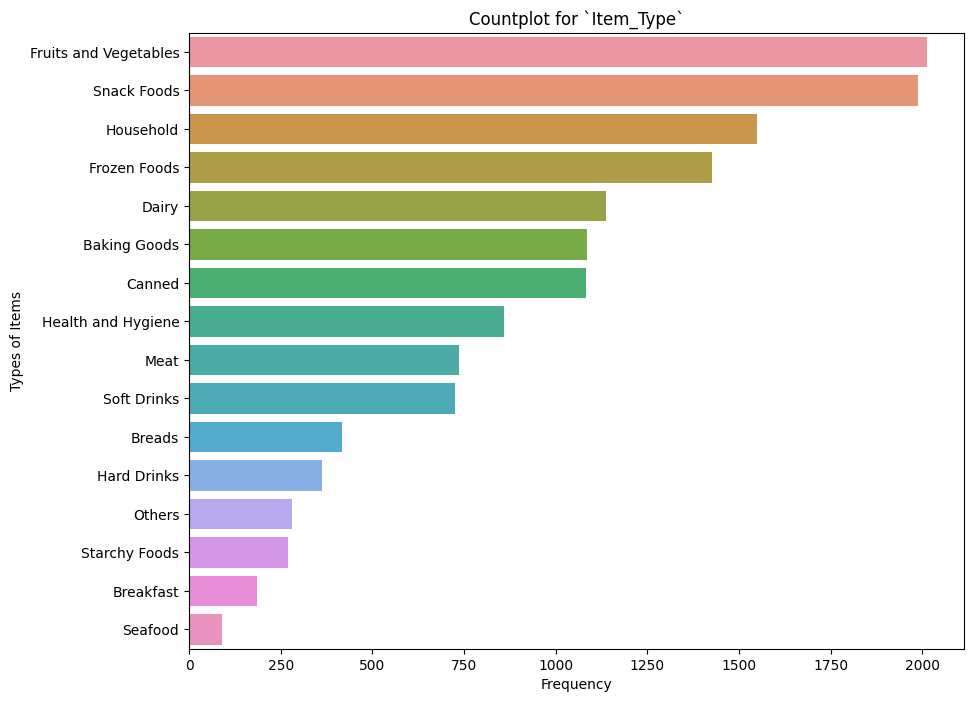

In [236]:
# Item_type countplot
plt.figure(figsize=(10,8))
sns.countplot(df, y="Item_Type", order=df.Item_Type.value_counts().index)
plt.ylabel("Types of Items")
plt.xlabel("Frequency")
plt.xticks()
plt.title("Countplot for `Item_Type`")
plt.show()

#### 6.3.3 Distribution of the `Outlet_Size`

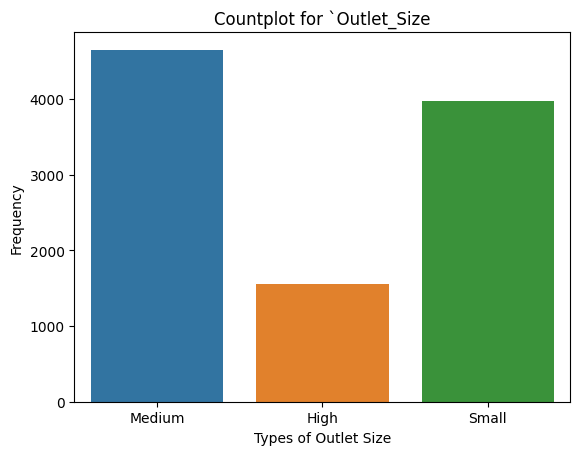

In [237]:
sns.countplot(df, x="Outlet_Size")
plt.xlabel("Types of Outlet Size")
plt.ylabel("Frequency")
plt.title("Countplot for `Outlet_Size");

#### 6.3.4 Distribution of the `Outlet_Location_Type`

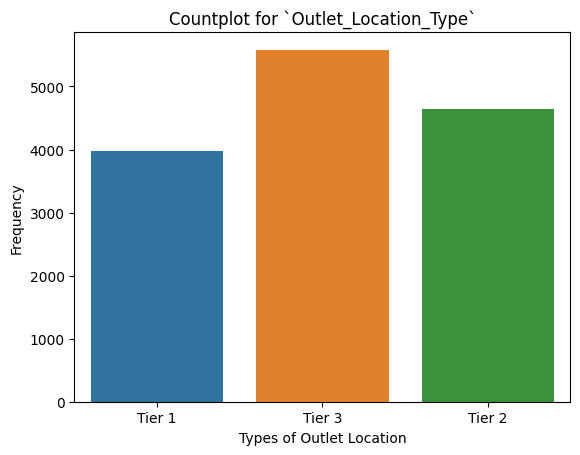

In [238]:
sns.countplot(df, x="Outlet_Location_Type")
plt.xlabel("Types of Outlet Location")
plt.ylabel("Frequency")
plt.title("Countplot for `Outlet_Location_Type`");

#### 6.3.5 Distribution of the `Outlet_Type`

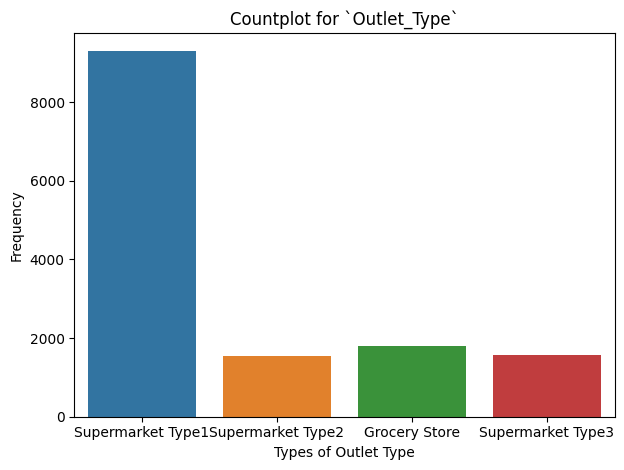

In [239]:
sns.countplot(df, x="Outlet_Type")
plt.xlabel("Types of Outlet Type")
plt.ylabel("Frequency")
plt.title("Countplot for `Outlet_Type`")
plt.tight_layout();

## 7. Bivariate Analysis

### 7.1 Numerical Variables

#### 7.1.1 `Item_Weight` and `Item_Outlet_Sales` analysis

Text(0.5, 1.0, 'Item Weigt vs Item Outlet Sales Scatter plot')

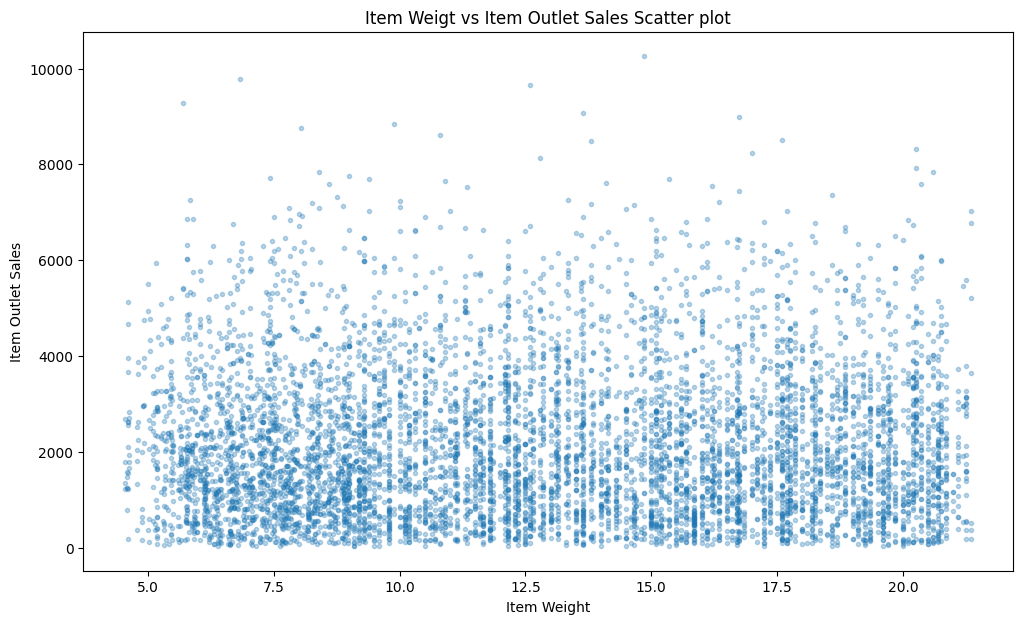

In [240]:
plt.figure(figsize=(12, 7))
plt.plot(df.Item_Weight, df.Item_Outlet_Sales, ".", alpha=0.3)
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.title("Item Weigt vs Item Outlet Sales Scatter plot")

🔎 Observations:
- `Item_Outlet_Sales` is spread well across the entire range of the `Item_Weight` without any obvious pattern.
- `Item_Weight` is should to have a low correlation with the target variable.

#### 7.1.2 `Item_Visibility` and `Item_Outlet_Sales` analysis

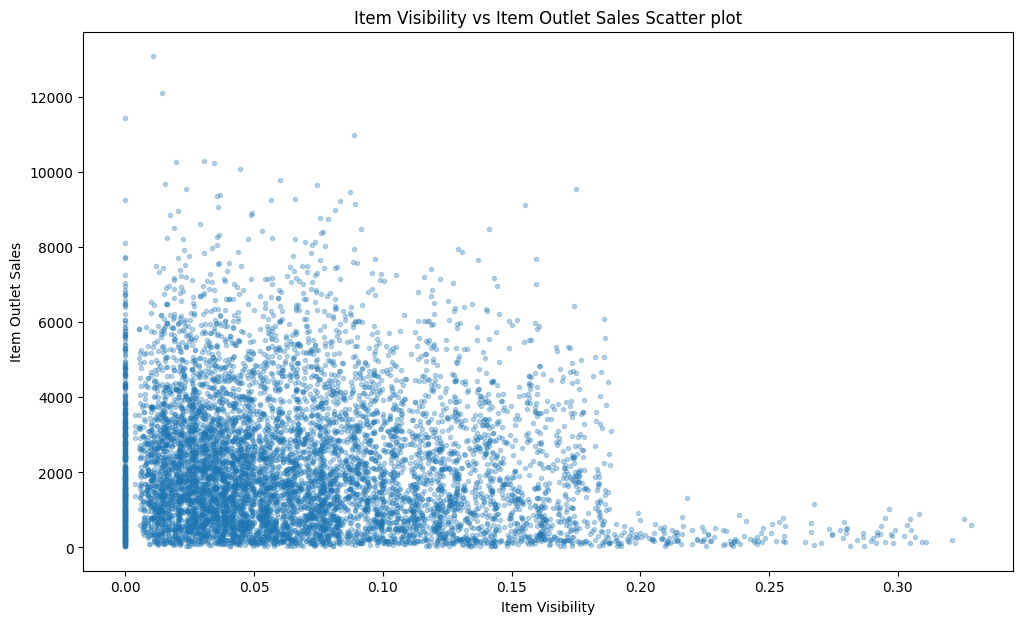

In [241]:
plt.figure(figsize=(12, 7))
plt.plot(df.Item_Visibility, df.Item_Outlet_Sales, ".", alpha=0.3)
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Item Visibility vs Item Outlet Sales Scatter plot");

🔎 Observations:
- Less visible items are sold more compared to more visibility items as outlet contains daily used items which contradicts the null hypothesis
- There is a string of points at `Item_Visibility` = 0 which seems strange as item visibility cannot be completely zero.

7.1.3 `Item_MRP` and `Item_Outlet_Sales` Analysis

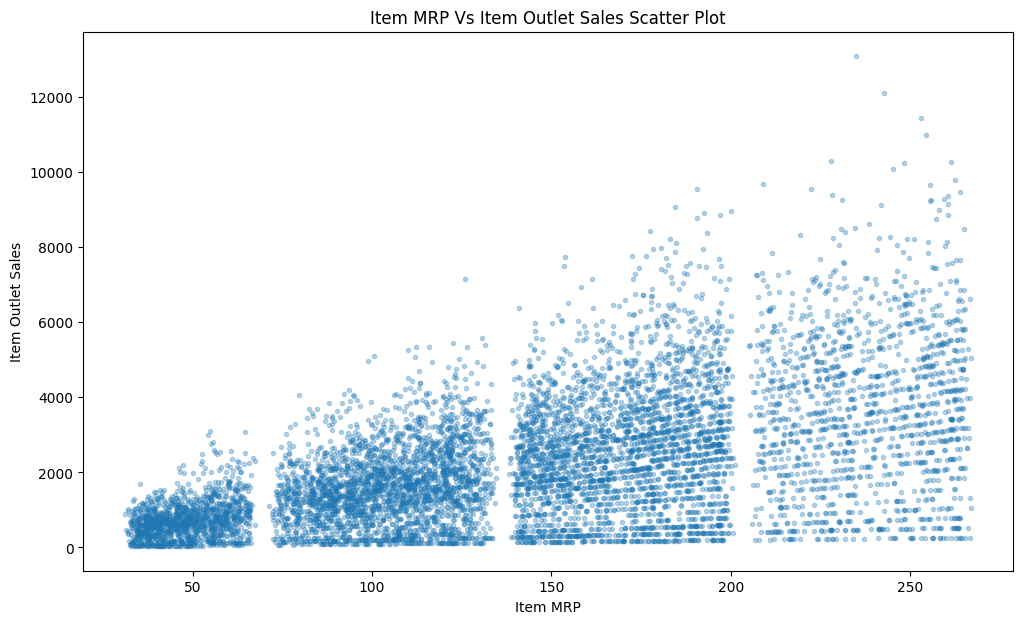

In [242]:
plt.figure(figsize=(12, 7))
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Item MRP Vs Item Outlet Sales Scatter Plot")
plt.plot(train.Item_MRP, train.Item_Outlet_Sales, ".", alpha=0.3)

🔎 Observations:
- We can clearly see that there are four segments of prices.
- The price range of MRP 150 to 250 has the highest range of products available.

#### 7.1.4 `Outlet_Establishment_Year` and `Item_Outlet_Sales` Analysis

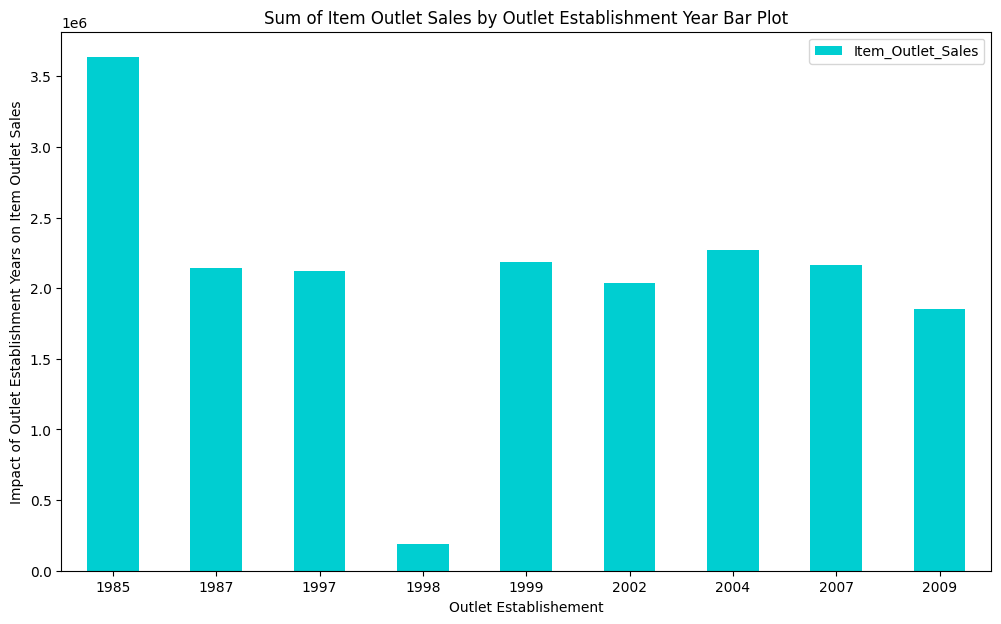

In [243]:
# Bar plot of sum of item outlet sales by outlet establishment year
Outlet_Establishment_Year_Sales = df.pivot_table(index="Outlet_Establishment_Year", values="Item_Outlet_Sales",
                                                aggfunc=np.sum)
Outlet_Establishment_Year_Sales.plot(kind="bar", color="darkturquoise", figsize=(12, 7))
plt.xlabel("Outlet Establishement")
plt.ylabel("Impact of Outlet Establishment Years on Item Outlet Sales")
plt.xticks(rotation=0)
plt.title("Sum of Item Outlet Sales by Outlet Establishment Year Bar Plot");


🔎 Observations
- Every new outlet established at that particular year, surprisingly has good sales except for the year 1998.:

### 7.2 Categorical Variables

#### 7.2.1 Impact of `Item_Identifier` on `Item_Outlet_Sales`

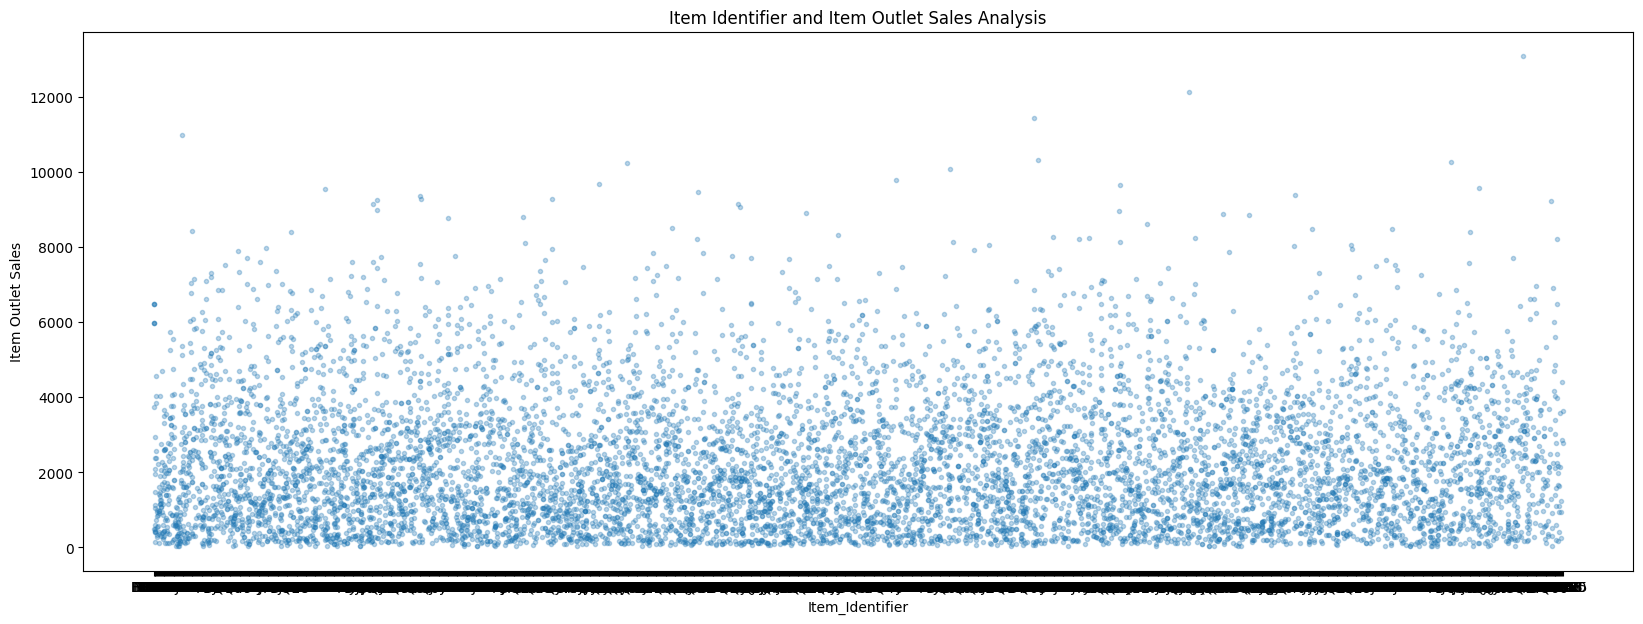

In [244]:
# Item Identifier vs Item Outlet Sales Scatter plot
plt.figure(figsize=(20, 7))
plt.xlabel("Item_Identifier")
plt.ylabel("Item Outlet Sales")
plt.title("Item Identifier and Item Outlet Sales Analysis")
plt.plot(df.Item_Identifier, df.Item_Outlet_Sales, ".", alpha=0.3);

#### 7.2.2 Impact of `Item_Fat_Content` on `Item_Outlet_Sales`

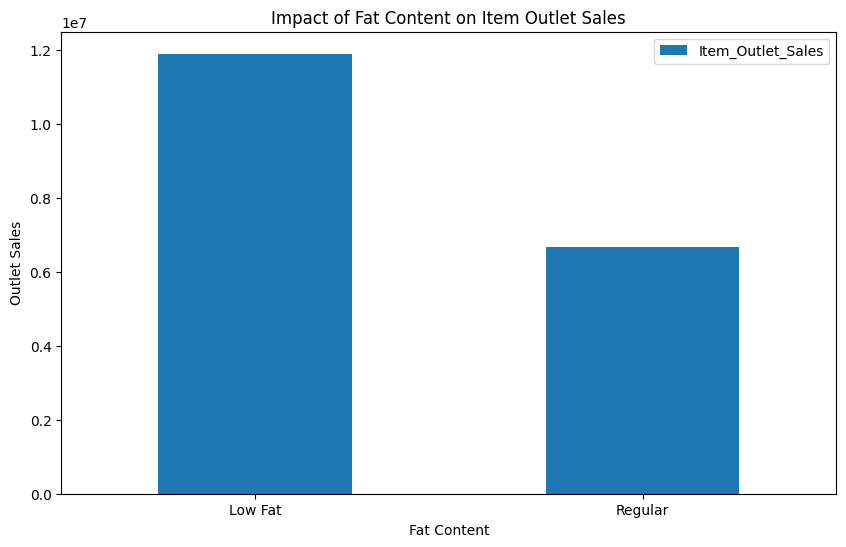

In [245]:
item_fat_content_sales = df.pivot_table(index="Item_Fat_Content", values="Item_Outlet_Sales", aggfunc=np.sum)
item_fat_content_sales.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Fat Content")
plt.ylabel("Outlet Sales")
plt.title("Impact of Fat Content on Item Outlet Sales")
plt.xticks(rotation=0);

🔎 Observations:
- "Low Fat" items have higher sales than "Regular" items

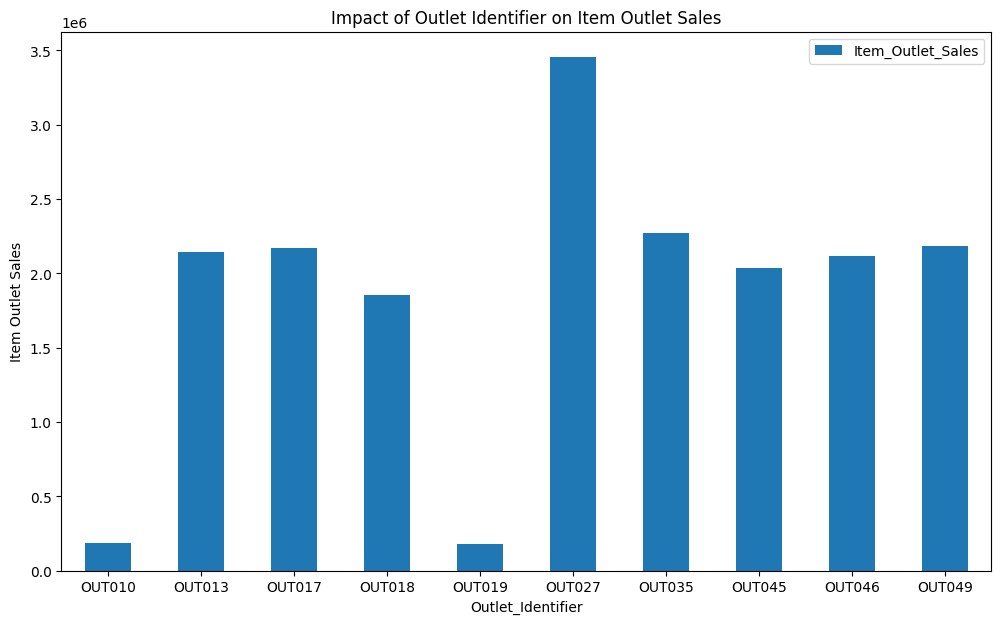

In [246]:
outlet_identifier_sales = df.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.sum)
outlet_identifier_sales.plot(kind="bar", figsize=(12, 7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Identifier on Item Outlet Sales")
plt.xticks(rotation=0);

🔎 Observations:
- The average sales are around 2000
- "OUT027" has the highest sales.
- "OUT010" and "OUT019" has a quite similar distribution depicting very smaller number of sales

#### 7.2.4 Impact of `Outlet_Size` on `Item_Outlet_Sales`

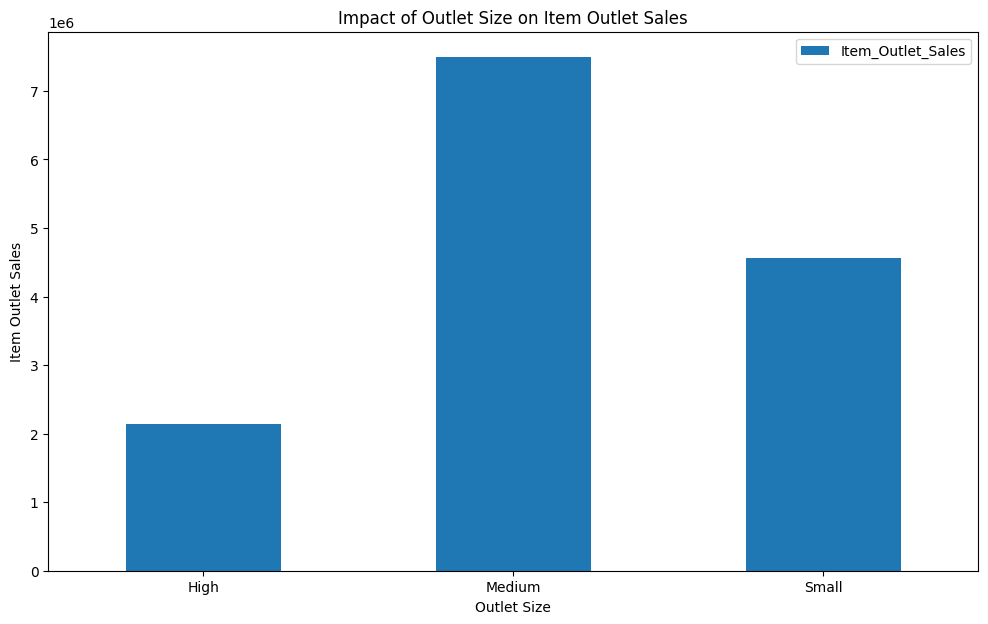

In [247]:
outlet_size_sales = train.pivot_table(index="Outlet_Size", values="Item_Outlet_Sales", aggfunc=np.sum)
outlet_size_sales.plot(kind="bar", figsize=(12, 7))
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Size on Item Outlet Sales")
plt.xticks(rotation=0);

🔎 Observations:
- We can observe that Medium Sized outlets are having higher sales, followed by `small` while `High` sized outlets have least among three, this is contradictory to our hypothesis.

#### 7.2.5 Impact of `Outlet_Location_Type` on `Item_Outlet_Sales`

<Axes: xlabel='Outlet_Location_Type'>

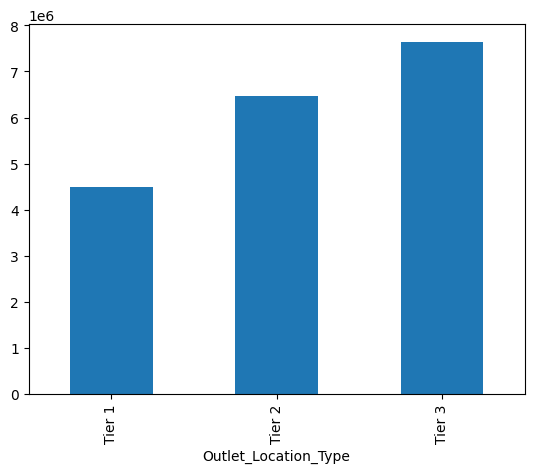

In [248]:
df_location_sales = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()
df_location_sales.plot(kind="bar")

🔎 Observations:
- Total sales in Tier 3 location is higher than tier 2 and tier 1 locations.

#### 7.2.6 Impact of `Outlet_Type` on `Item_Outlet_Sales`

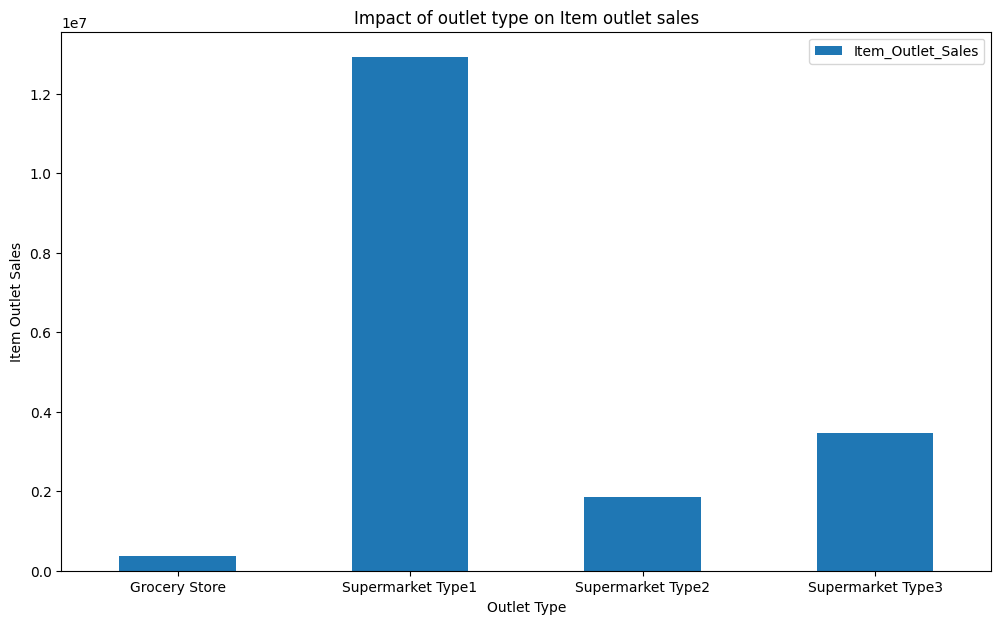

In [249]:
outlet_type_sales = df.pivot_table(index="Outlet_Type", values="Item_Outlet_Sales", aggfunc=np.sum)
outlet_type_sales.plot(kind="bar", figsize=(12, 7))
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of outlet type on Item outlet sales")
plt.xticks(rotation=0);

🔎 Observations:
- Grocery store has most of its data points around the lower sales values as compared to the other categories.
- While the total contribution of Supermarket Type 1 is the highest.

#### 7.2.7 Impact of `Item_Type` on `Item_Outlet_Sales`

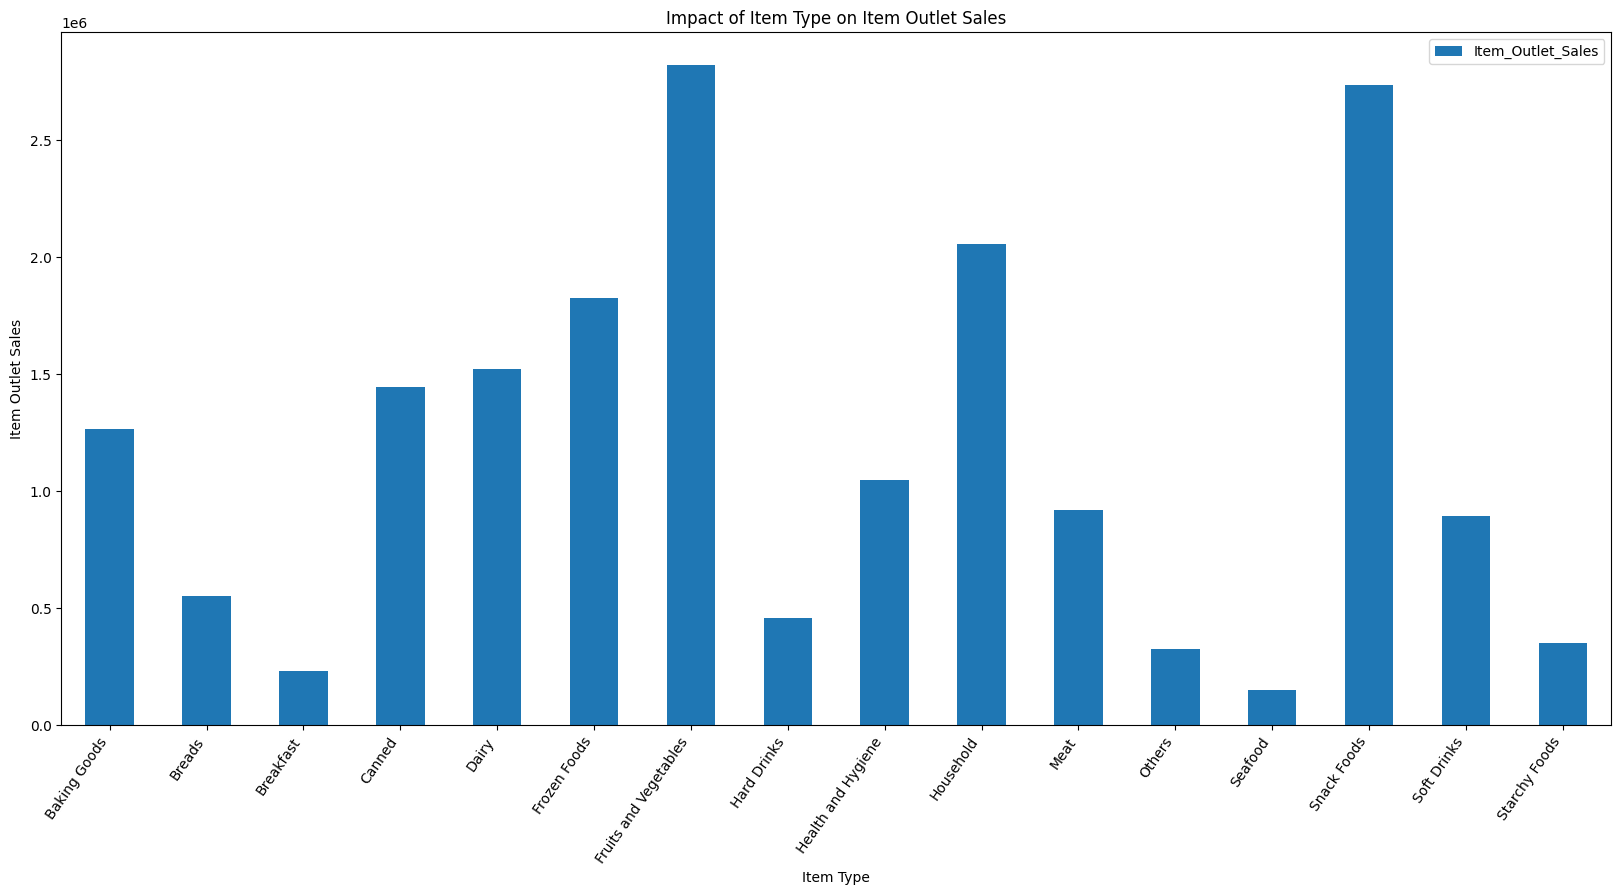

In [250]:
item_type_sales = df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.sum)
item_type_sales.plot(kind="bar", figsize=(20,9))
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item Type on Item Outlet Sales")
plt.xticks(rotation=55, ha="right");

🔎 Observations:
- "Fruits and vegetables" and "Snack Foods" have higher total sales than other categories, while "seafood" and "breakfast" categories have lowest total sales.

#### 7.2.8 Relation between `Item_Type` and `Item_Visibility`

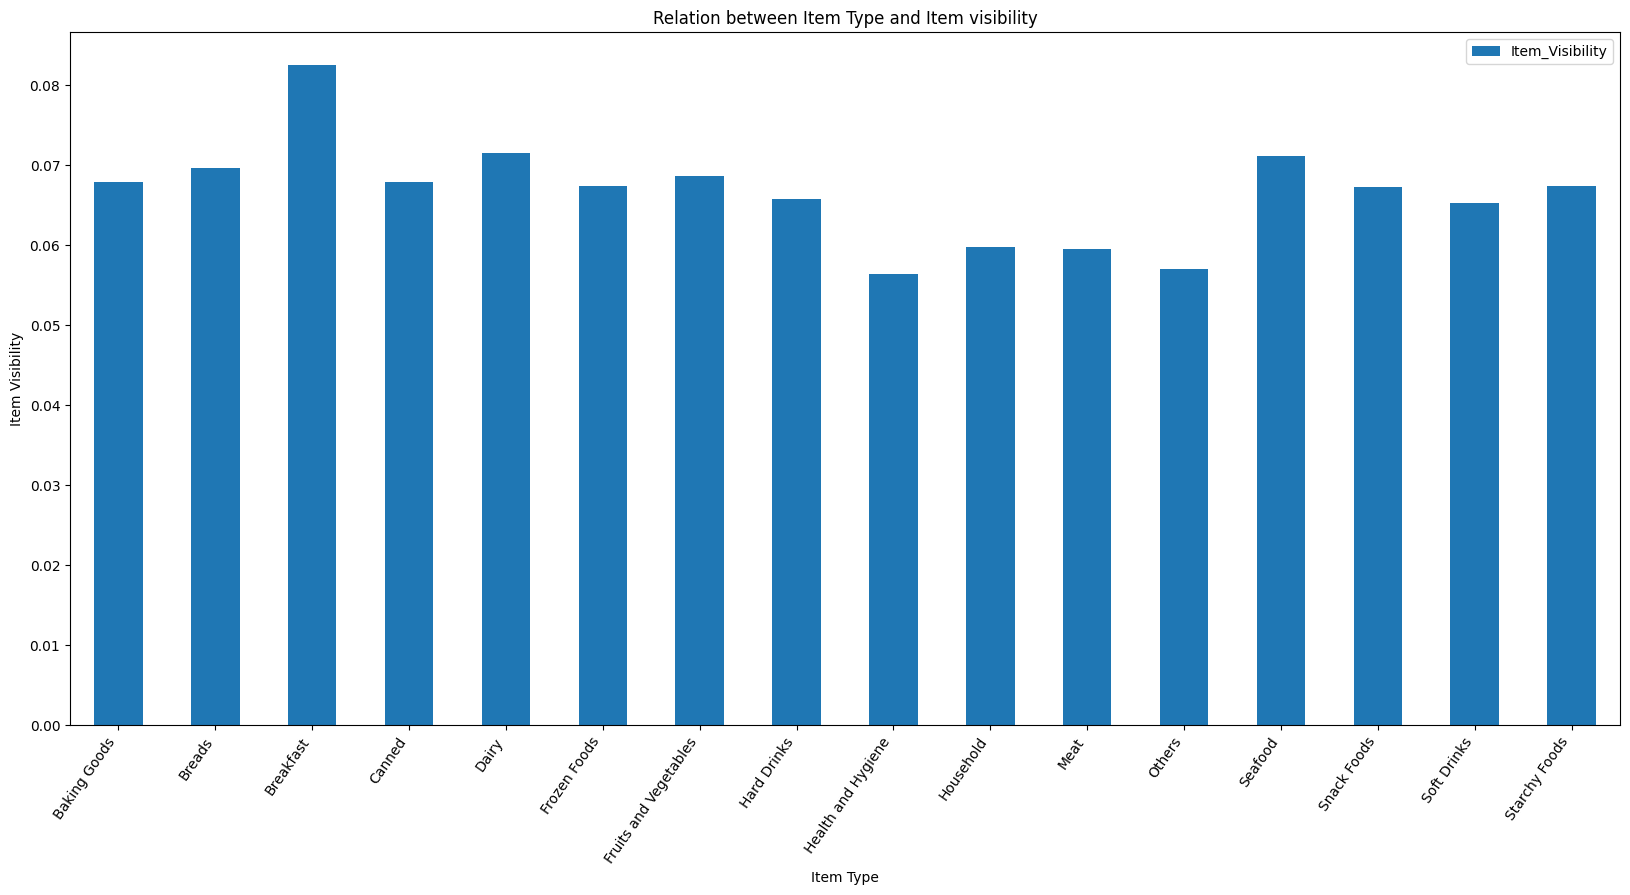

In [251]:
item_type_visibility = df.pivot_table(index="Item_Type", values="Item_Visibility", aggfunc=np.mean)
item_type_visibility.plot(kind="bar", figsize=(20,9))
plt.xlabel("Item Type")
plt.ylabel("Item Visibility")
plt.title("Relation between Item Type and Item visibility")
plt.xticks(rotation=55, ha="right");

🔎 Observations:
- From above 2 charts we can infer that there is no relationship between `Item_Visibility` and `Sales`

## 8. Missing Value Treatment

In [252]:
# missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

#### 8.1 Impute `Item_Weight` by the average weight of that particular item

In [253]:
# Determine the average weight per item
item_avg_weight = df.pivot_table(values="Item_Weight", index="Item_Identifier")

# Getting a boolean variable specifying missing Item_Weight values
miss_bool = df["Item_Weight"].isnull()

# Imputing data and checking missing values before and after imputation to confirm
print(f"Total number of original missing values: {sum(miss_bool)}")

df.loc[miss_bool, "Item_Weight"] = df.loc[miss_bool, "Item_Identifier"].apply(lambda x: item_avg_weight.at[x, "Item_Weight"])
print("Total number of final missing values: ", sum(df["Item_Weight"].isnull()))

Total number of original missing values: 2439
Total number of final missing values:  0


#### 8.2 Impute `Outlet_Size` with the mode of the `Outlet_Size` for that particular type of outlet

In [254]:
# Creating a dictionary of outlet_type : mode(outlet_size)
df.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [255]:
# Determining the mode
outlet_size_mode = pd.Series({"Grocery Store": "Small", 
                              "Supermarket Type1": "Small",
                              "Supermarket Type2": "Medium",
                              "Supermarket Type3": "Medium"})

# Getting a boolean variable specifying missing Item_Weight values.
miss_bool = df["Outlet_Size"].isnull()

# Imputing data and checking missing values before and after imputation to confirm
print("\nTotal number of original missing values:", sum(miss_bool))

df.loc[miss_bool, "Outlet_Size"] = df.loc[miss_bool, "Outlet_Type"].apply(lambda x: outlet_size_mode[x])
print("Total number of final missing values:", sum(df["Outlet_Size"].isnull()))


Total number of original missing values: 4016
Total number of final missing values: 0


## 9. Feature Engineering

### Modify `Item_Visibility`
The minimum value is 0 which makes no practical sense. Let's consider it like missing information and impute it with mean of that product.

In [257]:
# Determining average visibility of a product
visibility_avg = df.pivot_table(values="Item_Visibility", index="Item_Identifier")

# Imputing 0 values with mean visibility of that product
miss_bool = (df["Item_Visibility"] == 0)

print(f"Total number of 0 values initially: {sum(miss_bool)}")
df.loc[miss_bool, "Item_Visibility"] = df.loc[miss_bool, "Item_Identifier"].apply(lambda x: visibility_avg.at[x, "Item_Visibility"])
print("Total number of 0 values after modification:", sum(df["Item_Visibility"] == 0))

Total number of 0 values initially: 879
Total number of 0 values after modification: 0


Earlier, we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the `visibility_avg` variable made above to achieve this.

In [258]:
# Determining another variable with mean ratio
df["Item_Visibility_MeanRatio"] = df.apply(lambda x: x["Item_Visibility"]/visibility_avg.loc[x["Item_Identifier"]], axis=1)
df["Item_Visibility_MeanRatio"].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

### Modify `Item_Type`

In [259]:
df.Item_Type.nunique()

16

The `Item_Type` variable has 16 unique categories which might not prove to be very useful in analysis. So, it is a good idea to combine them.

One way could be to manually assign a new category to each. But, if we look at the `Item_Identifier`, i.e the unique ID of each item, it starts with either `FD, DR or NC`. If we see categories, these look like being Food, Drinks and Non-Consumables.

In [260]:
# Getting the first two characters of ID
df["Item_Type_Combined"] = df["Item_Identifier"].apply(lambda x: x[0: 2])

# Check category value counts
df["Item_Type_Combined"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

There are some non-consumables as well and a fat_content should not be specified for them. So we can also create a separate category for such kind of observations.

In [261]:
df.loc[df["Item_Type_Combined"] == "NC", "Item_Fat_Content"] = "Non-Edible"
df["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Determine the years of operation of a store

In [263]:
# Subtracting from 2013 as the data is collected in 2013
df["Outlet_Years"] = 2013 - df["Outlet_Establishment_Year"]
df["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

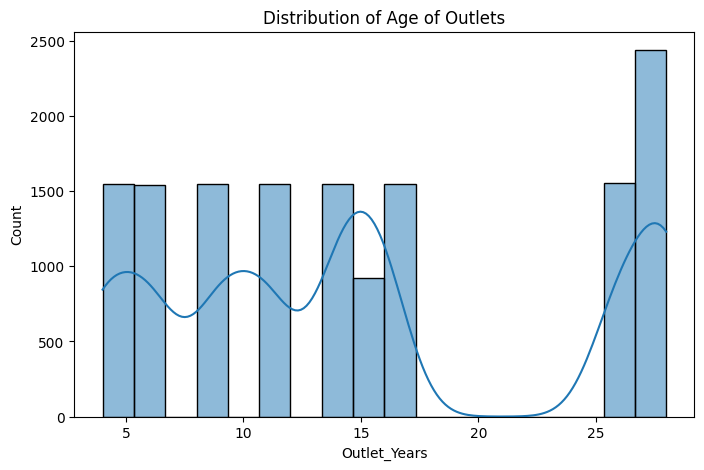

In [267]:
# plot outlet years distribution
plt.figure(figsize=(8,5))
sns.histplot(df.Outlet_Years, kde=True)
plt.title("Distribution of Age of Outlets");

🔎 Observations:
- Hence, we can observe that stores are 4-28 years old.

## 10. Encoding Categorical Variables

Since, `scikit-learn` accepts only numerical variables, we need to convert all categories of nominal variables into numeric type variables. I have created a new variable `Outlet` same as `Outlet_Identifier` but encoded that.

In [268]:
le = LabelEncoder()

df["Outlet"] = le.fit_transform(df["Outlet_Identifier"])

var_mod = ["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Item_Type_Combined", "Outlet_Type"]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [269]:
# Check df sample
df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet
9118,DRY23,9.395,2,0.109006,Soft Drinks,43.3112,OUT013,1987,0,2,1,NaN,test,0.921522,0,26,1
9930,FDV46,18.200,0,0.012605,Snack Foods,137.8180,OUT035,2004,2,1,1,NaN,test,1.027638,1,9,6


## 11. One Hot Encoding

In [270]:
# One hot encode using pd get dummies
df = pd.get_dummies(df, columns=["Item_Fat_Content", "Outlet_Location_Type", 
                                 "Outlet_Size", "Outlet_Type", "Item_Type_Combined",
                                 "Outlet"])

# Check all column names after applying get dummies
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'source', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

### Let's have a look at the data types and presence of non-missing values.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Item_Visibility_MeanRatio  14204 non-null  float64
 10  Outlet_Years               14204 non-null  int64  
 11  Item_Fat_Content_0         14204 non-null  uint8  
 12  Item_Fat_Content_1         14204 non-null  uint8  
 13  Item_Fat_Content_2         14204 non-null  uin

## 12. Pre-Processing Data

Converting data back into train and test data sets. And it is generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions.

In [272]:
# Dropping columns which have been converted to different types.
df.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

# Dividing into test and train
train = df.loc[df["source"] == "train"]
test = df.loc[df["source"] == "test"]

# Dropping un-necessary columns
train.drop(["source"], axis=1, inplace=True)
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)

# Exporting files as modified versions
train.to_csv("data/train_modified.csv", index=False)
test.to_csv("data/test_modified.csv", index=False)

C:\Users\abhirav\AppData\Local\Temp\ipykernel_1708\16910614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["source"], axis=1, inplace=True)
C:\Users\abhirav\AppData\Local\Temp\ipykernel_1708\16910614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)


In [273]:
train = pd.read_csv("data/train_modified.csv")
test = pd.read_csv("data/test_modified.csv")

## 13. Modelling

In [319]:
# Defining target and ID columns
target = "Item_Outlet_Sales"
IDcol = ["Item_Identifier", "Outlet_Identifier"]

def train_model(model, dtrain, dtest, predictors, target, IDcol, scaler):
    # Apply MinMax Scaler on data
    dtrain[predictors] = scaler.fit_transform(dtrain[predictors])
    dtest[predictors] = scaler.transform(dtest[predictors])
    # Fit the algorithm on the data
    model.fit(dtrain[predictors], dtrain[target]) # X_train, y_train

    # Predict training set
    dtrain_predictions = model.predict(dtrain[predictors]) # X_train

    # Perform cross-validation
    cv_score = cross_val_score(model, dtrain[predictors], dtrain[target],
                              cv=5, scoring="r2")

    # Print model report
    print(f"{model.__class__.__name__} Model report:")
    print(f"Mean Absolute Error: {mean_absolute_error(dtrain[target].values, dtrain_predictions):2g}")
    print(f"Root Mean Square Error (RMSE): {np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)):.2g}")
    print(f"CV Score: Mean = {np.mean(cv_score):.4f}")
    print(f"Accuracy score: {model.score(dtrain[predictors], dtrain[target]):.3%}")

    # Predict on testing data
    dtest[target] = model.predict(dtest[predictors]) # X_test

### Linear Regression

In [320]:
predictors = [x for x in train.columns if x not in [target] + IDcol]

model_1 = LinearRegression()
scaler = MinMaxScaler()
train_model(model_1, train, test, predictors, target, IDcol, scaler)

LinearRegression Model report:
Mean Absolute Error: 836.027
Root Mean Square Error (RMSE): 1.1e+03
CV Score: Mean = 0.5605
Accuracy score: 56.341%


### Regularized Linear Regression - Ridge

In [321]:
model_2_1 = Ridge(alpha=0.05)

scaler = MinMaxScaler()
train_model(model_2_1, train, test, predictors, target, IDcol, scaler)

Ridge Model report:
Mean Absolute Error: 836.11
Root Mean Square Error (RMSE): 1.1e+03
CV Score: Mean = 0.5610
Accuracy score: 56.351%


### Regularized Linear Regression - Lasso

In [322]:
model_2_2 = Lasso(alpha=0.4)

scaler = MinMaxScaler()
train_model(model_2_2, train, test, predictors, target, IDcol, scaler)

Lasso Model report:
Mean Absolute Error: 835.859
Root Mean Square Error (RMSE): 1.1e+03
CV Score: Mean = 0.5611
Accuracy score: 56.347%


### Random Forest

In [323]:
model_4 = RandomForestRegressor(n_estimators=500, n_jobs=-1)

scaler = MinMaxScaler()
train_model(model_4, train, test, predictors, target, IDcol, scaler)

RandomForestRegressor Model report:
Mean Absolute Error: 290.244
Root Mean Square Error (RMSE): 4.1e+02
CV Score: Mean = 0.5573
Accuracy score: 94.099%


### XGBoost

In [326]:
model_5 = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=-1)

scaler = MinMaxScaler()
train_model(model_5, train, test, predictors, target, IDcol, scaler)

XGBRegressor Model report:
Mean Absolute Error: 514.889
Root Mean Square Error (RMSE): 7.2e+02
CV Score: Mean = 0.5377
Accuracy score: 82.267%


🔎 Observations:

As the profit made by the BigMart is directly proportional to the accurate prediction of sales, they are desiring more accurate prediction algorithm so that the company will not suffer any losses.

RandomForest has produced more accurate predictions as compared to the other techniques like Linear Regression, Regularized Regression, XGBoost etc

We can also conclude that RandomForest with lowest MAE and RMSE and also with highest accuracy among all the other models, performs better as compared to the others.